In [1]:
import glob
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline




Concatenación y conversión de todas las tablas

In [2]:
"""
folder_path = "/home/alejandro/practicas_memoria/scrapers/data"

# Lee todos los archivos Excel en la carpeta especificada data
all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

data_frames = []

# Lee cada archivo Excel, agrega columnas de temporada y jornada, y almacena su contenido en la lista
for file in all_files:
    # Extrae información de temporada y jornada del nombre del archivo
    file_name = os.path.basename(file)
    jornada, temporada = file_name.split('_')  # Asumiendo que el nombre del archivo contiene "temporada_jornada.xlsx"

    df = pd.read_excel(file)

    # Agrega columnas de temporada y jornada
    df['Temporada'] = temporada.split('Stats')[0]
    df['Jornada'] = jornada

    data_frames.append(df)

# Concatena todos los DataFrames en uno
concatenated_df = pd.concat(data_frames, ignore_index=True)

# Guarda el DataFrame concatenado en un nuevo archivo Excel
concatenated_df.to_csv("all_seasons_data.csv", index=False)
"""

'\nfolder_path = "/home/alejandro/practicas_memoria/scrapers/data"\n\n# Lee todos los archivos Excel en la carpeta especificada data\nall_files = glob.glob(os.path.join(folder_path, "*.xlsx"))\n\ndata_frames = []\n\n# Lee cada archivo Excel, agrega columnas de temporada y jornada, y almacena su contenido en la lista\nfor file in all_files:\n    # Extrae información de temporada y jornada del nombre del archivo\n    file_name = os.path.basename(file)\n    jornada, temporada = file_name.split(\'_\')  # Asumiendo que el nombre del archivo contiene "temporada_jornada.xlsx"\n\n    df = pd.read_excel(file)\n\n    # Agrega columnas de temporada y jornada\n    df[\'Temporada\'] = temporada.split(\'Stats\')[0]\n    df[\'Jornada\'] = jornada\n\n    data_frames.append(df)\n\n# Concatena todos los DataFrames en uno\nconcatenated_df = pd.concat(data_frames, ignore_index=True)\n\n# Guarda el DataFrame concatenado en un nuevo archivo Excel\nconcatenated_df.to_csv("all_seasons_data.csv", index=False)\

In [2]:
df = pd.read_csv("all_seasons_data.csv",low_memory=False)

In [131]:
import matplotlib.cm as cm
def top_10_players(season):
    seasons = df[df['Temporada'] == season]

    average_salary_by_jornada = seasons.groupby('Jornada')['mv'].mean()

    overall_average_salary = average_salary_by_jornada.mean()

    top_players = seasons.groupby('nn').filter(lambda x: x['mv'].mean() > overall_average_salary)

    top_10_players = top_players.groupby('nn')['mv'].mean().nlargest(10)
    return top_10_players

In [132]:
for temporada in df['Temporada'].unique():
    top_10_players_data = top_10_players(temporada)

    # Extract player names and points from the top_10_players_data
    player_names = top_10_players_data.index.tolist()
    player_points = top_10_players_data.values.tolist()

    plt.figure()
    plt.bar(player_names, player_points, color=colors)
    plt.title(f"Top 10 Players by Points - Temporada {temporada}")
    plt.xlabel("Player")
    plt.ylabel("Points")
    plt.xticks(rotation=45)  # Rotate player names for better readability
    plt.tight_layout()
    plt.show()

NameError: name 'colors' is not defined

<Figure size 640x480 with 0 Axes>

In [133]:
#convert jornada to int and sort by jornada
df['Jornada'] = df['Jornada'].str.split('Week').str[1].astype(int)
df['Temporada'] = df['Temporada'].str.split('Season').str[1].astype(int)

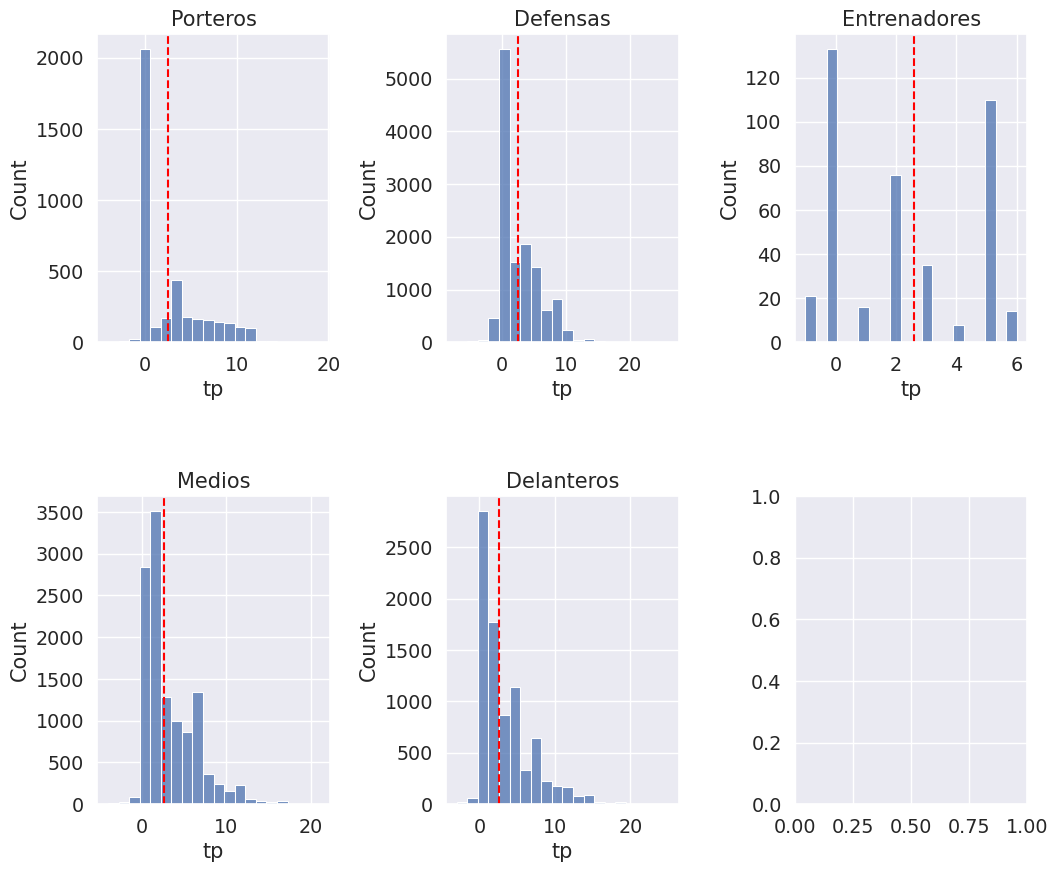

In [134]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)


axes[0,0].set_title('Porteros')
sns.histplot(df[df['pid'] == 1]['tp'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,1].set_title('Defensas')
sns.histplot(df[df['pid'] == 2]['tp'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[0,2].set_title('Entrenadores')
sns.histplot(df[df['pid'] == 5]['tp'], bins=20, ax=axes[0, 2])
axes[0,2].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,0].set_title('Medios')
sns.histplot(df[df['pid'] == 3]['tp'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')

axes[1,1].set_title('Delanteros')
sns.histplot(df[df['pid'] == 4]['tp'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df.groupby('pid').agg({'tp': ['mean']}).values[0], color='red', linestyle='--')


plt.show()


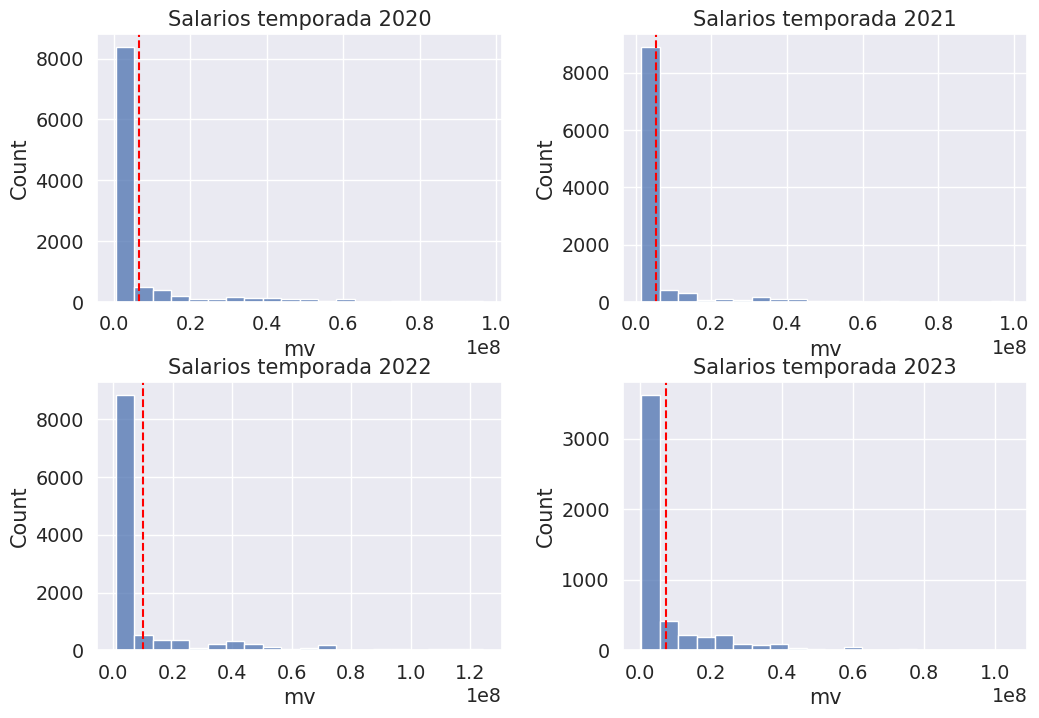

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


axes[0,0].set_title('Salarios temporada 2020')
sns.histplot(df[df['Temporada'] == 2020]['mv'], bins=20, ax=axes[0, 0])
axes[0,0].axvline(df[df['Temporada'] == 2020]['mv'].mean(), color='red', linestyle='--')

axes[0,1].set_title('Salarios temporada 2021')
sns.histplot(df[df['Temporada'] == 2021]['mv'], bins=20, ax=axes[0, 1])
axes[0,1].axvline(df[df['Temporada'] == 2021]['mv'].mean(), color='red', linestyle='--')

axes[1,0].set_title('Salarios temporada 2022')
sns.histplot(df[df['Temporada'] == 2022]['mv'], bins=20, ax=axes[1, 0])
axes[1,0].axvline(df[df['Temporada'] == 2022]['mv'].mean(), color='red', linestyle='--')


axes[1,1].set_title('Salarios temporada 2023')
sns.histplot(df[df['Temporada'] == 2023]['mv'], bins=20, ax=axes[1, 1])
axes[1,1].axvline(df[df['Temporada'] == 2023]['mv'].mean(), color='red', linestyle='--')



plt.show()


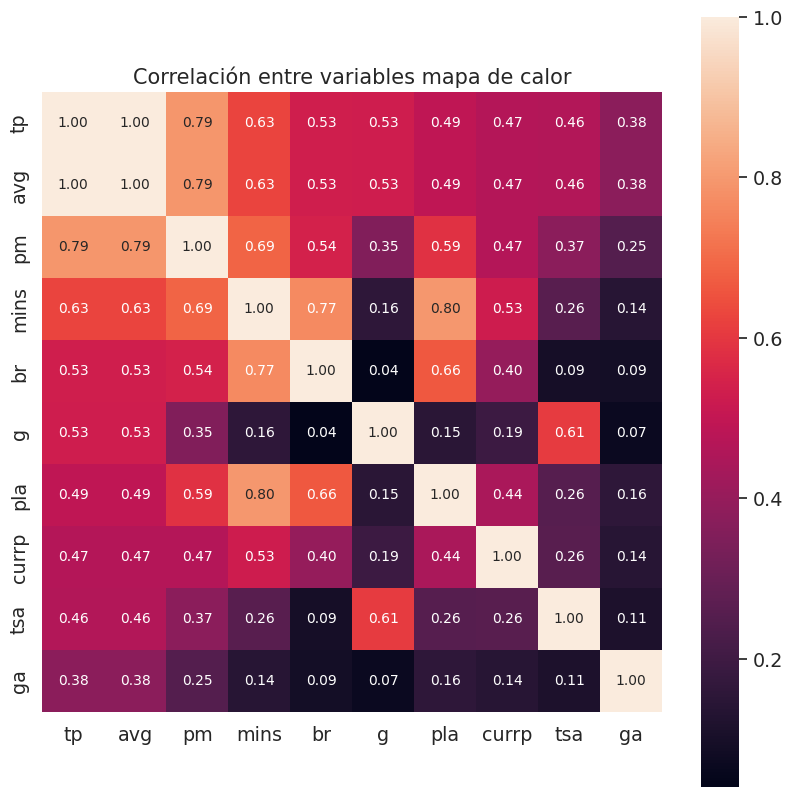

In [136]:
stats_corr = df.select_dtypes(include=[np.number]).corr()


k = 10 
cols = stats_corr.nlargest(k, 'tp')['tp'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
plt.title('Correlación entre variables mapa de calor')

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [137]:
df['tp'].describe()

count    37601.000000
mean         2.939975
std          3.323144
min         -7.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         26.000000
Name: tp, dtype: float64

Text(0.5, 1.0, 'Histogram of total points')

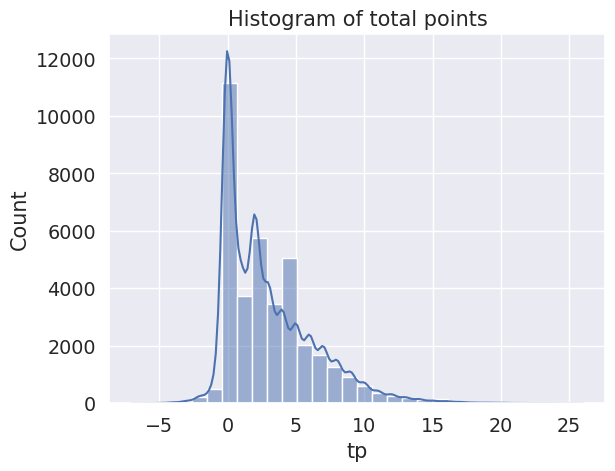

In [138]:
g = sns.histplot(df['tp'], bins=30, kde=True)
g.set_title('Histogram of total points')

Text(0.5, 1.0, 'Boxplot of total points')

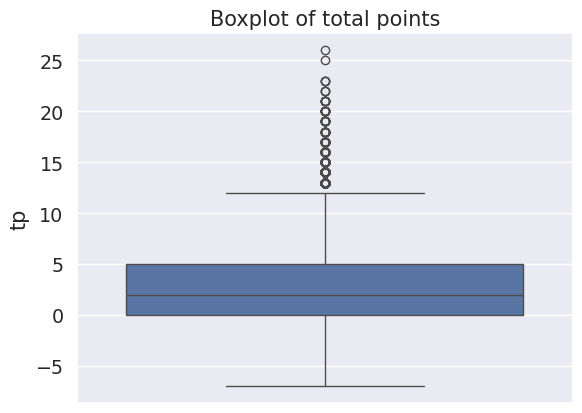

In [139]:
g = sns.boxplot(df['tp'])
g.set_title('Boxplot of total points')

In [140]:
df.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,blspp,currp,pss,tn,avg,ip,ren,slug,Temporada,Jornada
0,0.0,2.0,0.0,350,20,Villarreal CF,0,17,89,2,...,128,193,NaN,Villarreal CF,17.0,1,43.79,chukwueze,2022,28
1,0.0,6.0,0.0,1319,13,C.A. Osasuna,0,17,90,2,...,30,116,NaN,C.A. Osasuna,17.0,2,2.15,abde,2022,28
2,0.0,3.0,0.0,1532,162,Cádiz CF,0,13,90,0,...,0,133,NaN,Cádiz CF,13.0,3,1.04,bongonda,2022,28
3,0.0,9.0,0.0,1352,33,RCD Mallorca,0,13,89,2,...,75,196,NaN,RCD Mallorca,13.0,4,42.96,muriqi,2022,28
4,0.0,7.0,0.0,1197,16,Real Sociedad,0,12,66,1,...,91,231,NaN,Real Sociedad,12.0,5,93.86,kubo,2022,28


In [141]:
df.columns

Index(['p', 'wp', 'ap', 'playerId', 'tid', 'nm', 'wn', 'tp', 'mins', 'g', 'ga',
       'oaa', 'pae', 'pw', 'ps', 's', 'ec', 'pf', 'og', 'gc', 'yc', 'syc',
       'rc', 'tsa', 'wc', 'br', 'pla', 'pc', 'pm', 'mv', 'mvd', 'nn', 'ts',
       'm', 'pid', 'lsp', 'blsp', 'blspp', 'currp', 'pss', 'tn', 'avg', 'ip',
       'ren', 'slug', 'Temporada', 'Jornada'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37601 entries, 0 to 37600
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   p          32564 non-null  float64
 1   wp         32564 non-null  float64
 2   ap         32564 non-null  float64
 3   playerId   37601 non-null  int64  
 4   tid        37601 non-null  int64  
 5   nm         32564 non-null  object 
 6   wn         37601 non-null  int64  
 7   tp         37601 non-null  int64  
 8   mins       37601 non-null  int64  
 9   g          37601 non-null  int64  
 10  ga         37601 non-null  int64  
 11  oaa        37601 non-null  int64  
 12  pae        37601 non-null  int64  
 13  pw         37601 non-null  int64  
 14  ps         37601 non-null  int64  
 15  s          37601 non-null  int64  
 16  ec         37601 non-null  int64  
 17  pf         37601 non-null  int64  
 18  og         37601 non-null  int64  
 19  gc         37601 non-null  int64  
 20  yc    

In [3]:
df = df.drop(columns=['mvd','mv','pss','tn','avg'])

In [4]:
df.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
0,0.0,2.0,0.0,350,20,Villarreal CF,0,17,89,2,...,3,150,109,128,193,1,43.79,chukwueze,Season2022,Week28
1,0.0,6.0,0.0,1319,13,C.A. Osasuna,0,17,90,2,...,4,0,0,30,116,2,2.15,abde,Season2022,Week28
2,0.0,3.0,0.0,1532,162,Cádiz CF,0,13,90,0,...,4,0,0,0,133,3,1.04,bongonda,Season2022,Week28
3,0.0,9.0,0.0,1352,33,RCD Mallorca,0,13,89,2,...,4,0,0,75,196,4,42.96,muriqi,Season2022,Week28
4,0.0,7.0,0.0,1197,16,Real Sociedad,0,12,66,1,...,3,0,0,91,231,5,93.86,kubo,Season2022,Week28


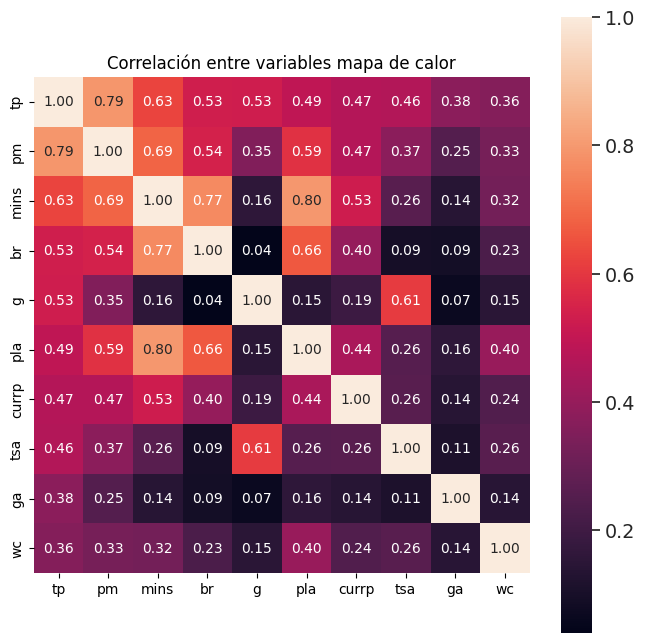

In [5]:
stats_corr = df.select_dtypes(include=[np.number]).corr()


k = 10 
cols = stats_corr.nlargest(k, 'tp')['tp'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(8,8))
plt.title('Correlación entre variables mapa de calor')

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df['pid'].unique()

array([3, 4, 1, 2, 5])

In [6]:
defensas = df[df['pid'] == 2]
defensas.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
10,0.0,3.0,0.0,1428,1,UD Almería,0,11,90,1,...,2,0,0,0,130,11,1.46,babic,Season2022,Week28
12,0.0,1.0,0.0,1491,2,Atlético de Madrid,0,10,90,1,...,2,0,0,0,134,13,21.67,nahuel-molina,Season2022,Week28
18,0.0,3.0,0.0,1049,28,Girona FC,0,10,90,0,...,2,0,0,52,101,19,1.13,david-lopez,Season2022,Week28
20,0.0,4.0,0.0,801,162,Cádiz CF,0,9,90,0,...,2,0,123,146,138,21,1.96,espino,Season2022,Week28
24,0.0,2.0,0.0,166,2,Atlético de Madrid,0,9,90,1,...,2,79,147,81,142,25,18.25,hermoso,Season2022,Week28


In [7]:
medios = df[df['pid'] == 3]
medios.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
0,0.0,2.0,0.0,350,20,Villarreal CF,0,17,89,2,...,3,150,109,128,193,1,43.79,chukwueze,Season2022,Week28
4,0.0,7.0,0.0,1197,16,Real Sociedad,0,12,66,1,...,3,0,0,91,231,5,93.86,kubo,Season2022,Week28
6,0.0,3.0,0.0,922,7,Elche CF,0,11,63,1,...,3,0,137,115,120,7,1.19,tete-morente,Season2022,Week28
7,0.0,1.0,0.0,271,16,Real Sociedad,0,11,90,0,...,3,185,142,203,182,8,64.62,mikel-merino,Season2022,Week28
8,0.0,0.0,0.0,1332,162,Cádiz CF,0,11,90,1,...,3,0,0,61,140,9,1.16,alcaraz,Season2022,Week28


In [8]:
delanteros = df[df['pid'] == 4]
delanteros.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
1,0.0,6.0,0.0,1319,13,C.A. Osasuna,0,17,90,2,...,4,0,0,30,116,2,2.15,abde,Season2022,Week28
2,0.0,3.0,0.0,1532,162,Cádiz CF,0,13,90,0,...,4,0,0,0,133,3,1.04,bongonda,Season2022,Week28
3,0.0,9.0,0.0,1352,33,RCD Mallorca,0,13,89,2,...,4,0,0,75,196,4,42.96,muriqi,Season2022,Week28
11,0.0,4.0,0.0,247,15,Real Madrid,0,10,90,1,...,4,116,144,297,227,12,124.31,vinicius-jr,Season2022,Week28
14,0.0,10.0,0.0,651,13,C.A. Osasuna,0,10,79,0,...,4,26,128,76,114,15,1.08,kike-barja,Season2022,Week28


In [9]:
entrenadores = df[df['pid'] == 5]
entrenadores.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
60,0.0,6.0,0.0,1558,20,Villarreal CF,0,6,0,0,...,5,0,0,0,79,61,1.80,quique-setien,Season2022,Week28
76,0.0,5.0,0.0,1359,162,Cádiz CF,0,5,0,0,...,5,0,0,0,78,77,2.16,sergio-gonzalez,Season2022,Week28
78,0.0,5.0,0.0,1369,16,Real Sociedad,0,5,0,0,...,5,0,0,0,129,79,2.16,imanol-alguacil,Season2022,Week28
82,0.0,5.0,0.0,1481,3,Athletic Club,0,5,0,0,...,5,0,0,0,91,83,2.16,ernesto-valverde,Season2022,Week28
90,0.0,5.0,0.0,1357,2,Atlético de Madrid,0,5,0,0,...,5,0,0,0,136,91,2.16,simeone,Season2022,Week28


### Porteros

In [10]:
porteros = df[df['pid'] == 1]
porteros.head()

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
5,0.0,4.0,0.0,1544,28,Girona FC,0,11,90,0,...,1,0,0,0,150,6,1.26,gazzaniga,Season2022,Week28
25,0.0,6.0,0.0,184,9,Getafe CF,0,9,90,0,...,1,196,145,212,237,26,15.71,david-soria,Season2022,Week28
32,0.0,5.0,0.0,274,16,Real Sociedad,0,8,90,0,...,1,134,200,220,230,33,23.57,remiro,Season2022,Week28
38,0.0,8.0,0.0,93,4,FC Barcelona,0,8,90,0,...,1,231,183,197,284,39,60.10,ter-stegen,Season2022,Week28
42,0.0,0.0,0.0,804,162,Cádiz CF,0,8,90,0,...,1,0,5,0,24,43,1.54,david-gil,Season2022,Week28


In [11]:
porteros.columns

Index(['p', 'wp', 'ap', 'playerId', 'tid', 'nm', 'wn', 'tp', 'mins', 'g', 'ga',
       'oaa', 'pae', 'pw', 'ps', 's', 'ec', 'pf', 'og', 'gc', 'yc', 'syc',
       'rc', 'tsa', 'wc', 'br', 'pla', 'pc', 'pm', 'nn', 'ts', 'm', 'pid',
       'lsp', 'blsp', 'blspp', 'currp', 'ip', 'ren', 'slug', 'Temporada',
       'Jornada'],
      dtype='object')

In [12]:
porteros.head(1)

,p,wp,ap,playerId,tid,nm,wn,tp,mins,g,...,pid,lsp,blsp,blspp,currp,ip,ren,slug,Temporada,Jornada
5,0.0,4.0,0.0,1544,28,Girona FC,0,11,90,0,...,1,0,0,0,150,6,1.26,gazzaniga,Season2022,Week28


In [13]:
porteros.columns

Index(['p', 'wp', 'ap', 'playerId', 'tid', 'nm', 'wn', 'tp', 'mins', 'g', 'ga',
       'oaa', 'pae', 'pw', 'ps', 's', 'ec', 'pf', 'og', 'gc', 'yc', 'syc',
       'rc', 'tsa', 'wc', 'br', 'pla', 'pc', 'pm', 'nn', 'ts', 'm', 'pid',
       'lsp', 'blsp', 'blspp', 'currp', 'ip', 'ren', 'slug', 'Temporada',
       'Jornada'],
      dtype='object')

- gc: goles en contra
- ec: despejes
- wc: regates
- br: balones recuperados
- pla: posesiones perdidas
- s: paradas
- rc: tarjetas rojas
- yc: tarjetas amarillas
- syc: segunda tarjeta amarilla
- ps: penaltis salvados
- pc: penaltis cometidos
- mins: minutos
- ren: rendimiento
- tp: puntos totales
- pm: puntos marca
- slug: player slug

In [14]:
porteros = porteros[['mins','ec','wc','br','pla','gc','rc','yc','syc','s','ps','pc','tp','pm','slug','Temporada','Jornada']]
porteros.head()

,mins,ec,wc,br,pla,gc,rc,yc,syc,s,ps,pc,tp,pm,slug,Temporada,Jornada
5,90,0,0,15,23,0,0,0,0,4,0,0,11,2,gazzaniga,Season2022,Week28
25,90,0,0,10,16,2,0,0,0,4,1,0,9,2,david-soria,Season2022,Week28
32,90,0,0,8,16,0,0,0,0,4,0,0,8,1,remiro,Season2022,Week28
38,90,0,0,7,4,0,0,0,0,0,0,0,8,1,ter-stegen,Season2022,Week28
42,90,0,0,7,8,0,0,0,0,2,0,0,8,1,david-gil,Season2022,Week28


In [15]:
porteros.shape,delanteros.shape,medios.shape,defensas.shape,entrenadores.shape

((3822, 17), (8496, 42), (12128, 42), (12742, 42), (413, 42))

In [16]:
porteros.head()

,mins,ec,wc,br,pla,gc,rc,yc,syc,s,ps,pc,tp,pm,slug,Temporada,Jornada
5,90,0,0,15,23,0,0,0,0,4,0,0,11,2,gazzaniga,Season2022,Week28
25,90,0,0,10,16,2,0,0,0,4,1,0,9,2,david-soria,Season2022,Week28
32,90,0,0,8,16,0,0,0,0,4,0,0,8,1,remiro,Season2022,Week28
38,90,0,0,7,4,0,0,0,0,0,0,0,8,1,ter-stegen,Season2022,Week28
42,90,0,0,7,8,0,0,0,0,2,0,0,8,1,david-gil,Season2022,Week28


In [17]:
rolling_mean = porteros.groupby('slug')[['mins','ec','wc','br','pla','gc','rc','yc','syc','s','ps','pc','tp','pm']].rolling(window=3).mean()
rolling_std = porteros.groupby('slug')[['mins','ec','wc','br','pla','gc','rc','yc','syc','s','ps','pc','tp','pm']].rolling(window=3).std()

In [18]:
rolling_mean = rolling_mean.fillna(0)
rolling_std = rolling_std.fillna(0)

In [19]:
rolling_mean.shape,rolling_std.shape,porteros.shape

((3822, 14), (3822, 14), (3822, 17))

In [20]:
porteros = porteros.merge(rolling_mean, how='left', on='slug', suffixes=('', '_mean_3'))
porteros = porteros.merge(rolling_std, how='left', on='slug', suffixes=('', '_std_3'))

In [21]:
porteros.head()

,mins,ec,wc,br,pla,gc,rc,yc,syc,s,...,pla_std_3,gc_std_3,rc_std_3,yc_std_3,syc_std_3,s_std_3,ps_std_3,pc_std_3,tp_std_3,pm_std_3
0,90,0,0,15,23,0,0,0,0,4,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.00000
1,90,0,0,15,23,0,0,0,0,4,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.00000
2,90,0,0,15,23,0,0,0,0,4,...,8.326664,1.000000,0.0,0.00000,0.0,2.081666,0.0,0.0,4.725816,0.57735
3,90,0,0,15,23,0,0,0,0,4,...,3.055050,1.000000,0.0,0.00000,0.0,2.081666,0.0,0.0,1.527525,0.57735
4,90,0,0,15,23,0,0,0,0,4,...,3.605551,1.154701,0.0,0.57735,0.0,2.645751,0.0,0.0,1.000000,0.57735
